In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [65]:
folder_path = "data/e production=ep sanyo ep sanyo 002"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064" and "TBA_CU"
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_CU" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 24658, Columns: 18
DataFrame 2 - Rows: 24362, Columns: 18
DataFrame 3 - Rows: 24883, Columns: 18
DataFrame 4 - Rows: 25924, Columns: 18
DataFrame 5 - Rows: 26120, Columns: 18
DataFrame 6 - Rows: 27188, Columns: 18
DataFrame 7 - Rows: 29402, Columns: 18
DataFrame 8 - Rows: 31975, Columns: 18
DataFrame 9 - Rows: 30654, Columns: 18
DataFrame 10 - Rows: 36473, Columns: 18
DataFrame 11 - Rows: 38244, Columns: 18
DataFrame 12 - Rows: 39577, Columns: 18
DataFrame 13 - Rows: 40823, Columns: 18
DataFrame 14 - Rows: 41530, Columns: 18
DataFrame 15 - Rows: 42054, Columns: 18
DataFrame 16 - Rows: 46057, Columns: 18
16


test that data is loaded succesfully

In [ ]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

### Crop The Values

In [59]:
filtered_dataframes = []

for df in dataframes:
    schritt_mask = ((df['Schritt'] == 4) | (df['Schritt'] == 5)) & (df['Zeit'] >= 10)
    start_index = df[schritt_mask]
    start_time = start_index.iloc[0]['Zeit']
    end_time = start_time + 4
    print(start_index.iloc[0]['Zeit'])

    time_mask = (df['Zeit'] >= start_time) & (df['Zeit'] <= end_time) & ((df['Schritt'] == 4) | (df['Schritt'] == 5))

    filtered_df = df[time_mask]
    filtered_dataframes.append(filtered_df)

15.7350361111429
16.70589444445239
16.75292777776718
16.695108333362473
16.740499999986753
16.64606944448418
16.534441666669316
17.178913888865047
18.749522222214274
20.634091666671964
17.931711111134952
18.39065277775129
17.616066666642826
18.48663888891538
17.361577777730094
16.47771944443385
16.93894444445769


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

In [ ]:
columns_to_plot = [15,9] 
I = 0
for i in dataframes:
    print("Graph No. :",I)
    print(dfarrnames[I])
    start_time = filtered_dataframes[I].iloc[0]['Zeit']
    plot_threshold(columns_to_plot, filtered_dataframes[I],start_time,start_time+3.5)
    I=I+1

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [60]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in filtered_dataframes:
    max_values = max_threshold(columns_to_plot, df, 0, 35)
    min_values = min_threshold(columns_to_plot, df, 0, 35)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.448761529223702], [2.448777993478871], [2.446193791001861], [2.444542847319099], [2.43743609476951], [2.432754285906412], [2.429332080242602], [2.444955034799932], [2.439673173310439], [2.591138859908824], [2.368139416397753], [2.337449211314379], [2.312506267153367], [2.350202045960032], [2.266364064562367], [2.233751735031547], [2.388802445646434]]
[[0.6704797727625191], [0.6974750542858601], [0.7251327584044702], [0.7594500903960579], [0.7855822811798134], [0.8118492215016886], [0.8574354662378028], [0.9220029864463868], [1.041336400048749], [1.396749104977062], [1.362443814736253], [1.474051654671712], [1.558469461879213], [1.686259874897587], [1.689968369115377], [1.74179400966932], [1.930382830811141]]
[1.7782817564611828, 1.7513029391930108, 1.7210610325973907, 1.6850927569230412, 1.6518538135896965, 1.6209050644047234, 1.5718966140047992, 1.5229520483535453, 1.3983367732616898, 1.1943897549317621, 1.0056956016615, 0.8633975566426673, 0.754036805274154, 0.6639421710624451, 0

### Extract Requried data
`skip_indeces` are thoese which is creating problem in graph

In [61]:
skip_indices = []

# Use list comprehension to skip specific indices
extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.7782817564611828, 1.7513029391930108, 1.7210610325973907, 1.6850927569230412, 1.6518538135896965, 1.6209050644047234, 1.5718966140047992, 1.5229520483535453, 1.3983367732616898, 1.1943897549317621, 1.0056956016615, 0.8633975566426673, 0.754036805274154, 0.6639421710624451, 0.5763956954469898, 0.4919577253622269, 0.45841961483529303]
range(0, 17)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

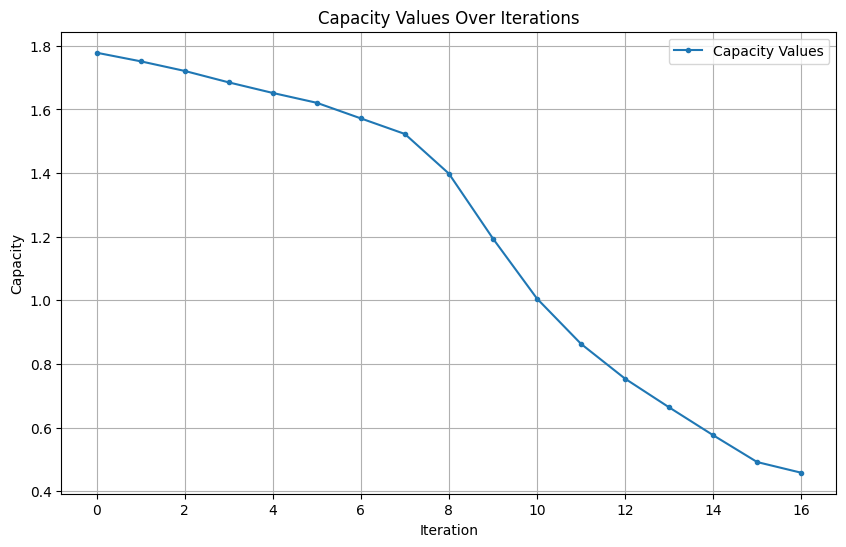

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [ ]:
csv_filename = "extracted_capacity_values_2.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

In [ ]:
csv_file = 'extracted_capacity_values_2.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

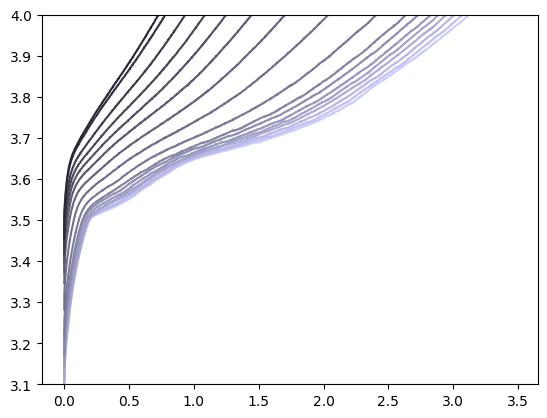

In [63]:
columns_to_plot = [15] 

plt1 = plt
i=0

for i,dataframe in enumerate(filtered_dataframes):
    if i not in skip_indices:
        start_time = filtered_dataframes[i].iloc[0]['Zeit']
        plot_threshold_same_plot(columns_to_plot, filtered_dataframes[i], start_time, start_time+4, plt1, y_min=3.1, y_max=4,i=i)
    else:
        print("Skipping index: ",i)
i=i+1

plt1.show()

### Croping Data

In [ ]:
import os
import csv

output_directory = "extracted_data"
os.makedirs(output_directory, exist_ok=True)

In [64]:
min_time = 3.1
max_time = 3.9
time_interval = 0.1

for current_time in np.arange(min_time, max_time + time_interval, time_interval):
    csv_filename = os.path.join(output_directory, f"extracted_voltage_data_{current_time:.1f}.csv")

    I = 0
    for index, dataframe in enumerate(filtered_dataframes):
        if index in skip_indices:
            print(f"Skipping index: {index}")
            continue

        voltage = dataframe['Spannung']
        voltage_mask = (dataframe['Spannung'] >= current_time) & (dataframe['Spannung'] <= current_time + time_interval)
        voltage = voltage[voltage_mask]
        voltage = voltage.to_numpy()

        if not voltage.size:
            continue

        voltage_range = np.linspace(voltage.min(), voltage.max(), num=50)

        data = {'Spannung{}'.format(i + 1): value for i, value in enumerate(voltage_range)}
        data['Capacity'] = max_values_list[I][0]

        with open(csv_filename, 'a', newline='') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=data.keys())
            # if index == 0:
            #     writer.writeheader()
            writer.writerow(data)

        I += 1

    print(f"Saved CSV file: {csv_filename}")

Saved CSV file: extracted_data\extracted_voltage_data_3.1.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.2.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.3.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.4.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.5.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.6.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.7.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.8.csv
Saved CSV file: extracted_data\extracted_voltage_data_3.9.csv
